In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
#from mpltools import color

import sys
sys.path.append("../src")
from numpy_filterbank import * 
%matplotlib inline

In [38]:
hyperparam_vals = np.load("../loss_records/arch_hyperparam_vals_10.npy")
loss_values = np.load("../loss_records/architecture_opt10.npy")
clf_acc = np.load("../loss_records/arch_score_vals10.npy")

hyperparam_config = hyperparam_vals[0]
hyperparam_vals = hyperparam_vals[1:]

images = np.load("../data/processed/train.npy")
simulated = np.load("../data/simulated/pr_train_simulated.npy")

test_scores_proton = clf_acc[:, 0, 1, 0]
sorted_indices_proton = np.argsort(test_scores_proton)

test_scores_noise = clf_acc[:, 0, 1, 2]
sorted_indices_noise = np.argsort(test_scores_noise)

tmp = np.zeros(np.array(clf_acc.shape) + [0, 0, 0, 1])
tmp[:, :, :, -1] = clf_acc.mean(axis=-1)
tmp[:, :, :, :3] = clf_acc
clf_acc = tmp

test_scores_mean = clf_acc[:, 0, 1, 3]
sorted_indices_mean = np.argsort(test_scores_mean)

loss_values = loss_values[sorted_indices_mean]
clf_acc = clf_acc[sorted_indices_mean]
hyperparam_vals = hyperparam_vals[sorted_indices_mean]
test_scores_proton = test_scores_proton[sorted_indices_mean]


In [39]:
clf_acc.mean(axis=-1).shape

(100, 2, 2)

In [40]:
hyperparam_config

'T, dec_state_size, latent_dim, loss_type, rw_type,         n_enc, n_dec, beta'

In [41]:
where_mmd = np.array([v[3] == "MMD" for v in hyperparam_vals])
where_kl = np.array([v[3] == "KL" for v in hyperparam_vals])

where_conv = np.array([v[4] == "conv" for v in hyperparam_vals])
where_attention = np.array([v[4] == "attention" for v in hyperparam_vals])

In [42]:
loss_values.shape

(100, 2, 20)

In [43]:
clf_acc.shape

(100, 2, 2, 4)

In [44]:
loss_values[np.isnan(loss_values)] = 1e4

In [50]:
for i in range(len(hyperparam_vals)):
    print("-----------------")
    print(hyperparam_vals[i])
    print(clf_acc[i])

-----------------
[8, 600, 24, 'MMD', 'conv', 1, 1, 6]
[[[0.40548554 0.         0.         0.13516185]
  [0.35474006 0.         0.         0.11824669]]

 [[0.         0.         0.76485788 0.25495263]
  [0.         0.         0.79372197 0.26457399]]]
-----------------
[6, 1000, 12, 'MMD', 'conv', 1, 1, 6]
[[[0.40548554 0.         0.         0.13516185]
  [0.35474006 0.         0.         0.11824669]]

 [[0.         0.         0.76485788 0.25495263]
  [0.         0.         0.79372197 0.26457399]]]
-----------------
[4, 300, 48, 'MMD', 'conv', 1, 1, 1]
[[[0.40548554 0.         0.         0.13516185]
  [0.35474006 0.         0.         0.11824669]]

 [[0.         0.         0.76485788 0.25495263]
  [0.         0.         0.79372197 0.26457399]]]
-----------------
[10, 900, 30, 'MMD', 'conv', 1, 1, 6]
[[[0.40548554 0.         0.         0.13516185]
  [0.35474006 0.         0.         0.11824669]]

 [[0.         0.         0.76485788 0.25495263]
  [0.         0.         0.79372197 0.264573

Text(0.5, 0, 'Simulation run - worst to best')

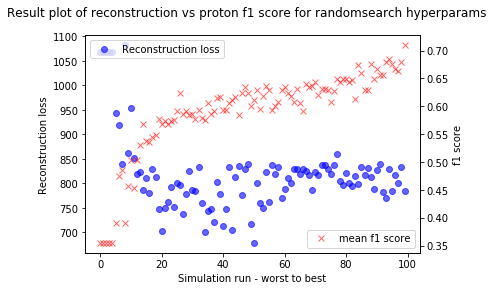

In [65]:
fig, ax1 = plt.subplots()

ax1.plot(np.arange(loss_values.shape[0]), loss_values[:, 0, -1], "bo",label="Reconstruction loss", alpha = 0.6)

ax2 = ax1.twinx()
ax2.plot(np.arange(loss_values.shape[0]), test_scores_proton, "rx", label="mean f1 score", alpha = 0.6)

ax1.legend(loc=2)
ax2.legend(loc=4)

fig.suptitle("Result plot of reconstruction vs proton f1 score for randomsearch hyperparams")
ax1.set_ylabel("Reconstruction loss")
ax2.set_ylabel("f1 score")


ax1.set_xlabel("Simulation run - worst to best")

Text(0.5, 0, 'Simulation run - worst to best')

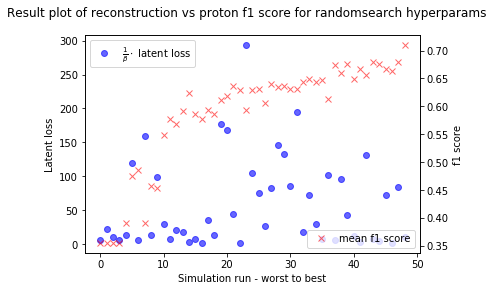

In [66]:
fig, ax1 = plt.subplots()

latent_loss_mmd = loss_values[:, 1, -1][where_mmd]
beta_mmd = np.array([v[-1] for v in hyperparam_vals])[where_mmd]
latent_loss_mmd_beta = latent_loss_mmd/beta_mmd

n_mmd = latent_loss_mmd.shape[0]
test_scores_proton_mmd = test_scores_proton[where_mmd]

ax1.plot(np.arange(n_mmd), latent_loss_mmd_beta, "bo", label=r"$\frac{1}{\beta} \cdot$ latent loss", alpha = 0.6)

ax2 = ax1.twinx()
ax2.plot(np.arange(n_mmd), test_scores_proton_mmd, "rx", label="mean f1 score", alpha = 0.6)

ax1.legend(loc=2)
ax2.legend(loc=4)

fig.suptitle("Result plot of reconstruction vs proton f1 score for randomsearch hyperparams")
ax1.set_ylabel("Latent loss")
ax2.set_ylabel("f1 score")


ax1.set_xlabel("Simulation run - worst to best")

Text(0.5, 0, 'Simulation run - worst to best')

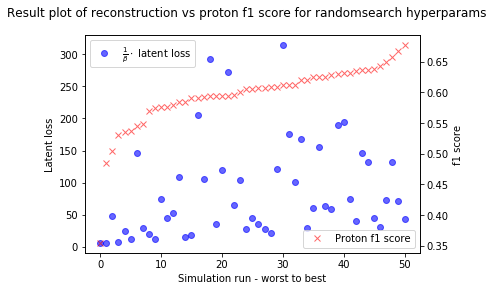

In [51]:
fig, ax1 = plt.subplots()

latent_loss_kl= loss_values[:, 1, -1][where_kl]
beta_kl = np.array([v[-1] for v in hyperparam_vals])[where_kl]
latent_loss_kl_beta = latent_loss_kl/beta_kl

n_kl = latent_loss_kl.shape[0]
test_scores_proton_kl = test_scores_proton[where_kl]

ax1.plot(np.arange(n_kl), latent_loss_kl_beta, "bo", label=r"$\frac{1}{\beta} \cdot$ latent loss", alpha = 0.6)

ax2 = ax1.twinx()
ax2.plot(np.arange(n_kl), test_scores_proton_kl, "rx", label="Proton f1 score", alpha = 0.6)

ax1.legend(loc=2)
ax2.legend(loc=4)

fig.suptitle("")
ax1.set_ylabel("Latent loss")
ax2.set_ylabel("f1 score")


ax1.set_xlabel("Simulation run - worst to best")

In [ ]:
fig, ax1 = plt.subplots()

dec

n_mmd = latent_loss_mmd.shape[0]
test_scores_proton_mmd = test_scores_proton[where_mmd]

ax1.plot(np.arange(n_mmd), latent_loss_mmd_beta, "bo", label=r"$\frac{1}{\beta} \cdot$ latent loss", alpha = 0.6)

ax2 = ax1.twinx()
ax2.plot(np.arange(n_mmd), test_scores_proton_mmd, "rx", label="Proton f1 score", alpha = 0.6)

ax1.legend(loc=2)
ax2.legend(loc=4)

fig.suptitle("Result plot of reconstruction vs proton f1 score for randomsearch hyperparams")
ax1.set_ylabel("Latent loss")
ax2.set_ylabel("f1 score")


ax1.set_xlabel("Simulation run - worst to best")

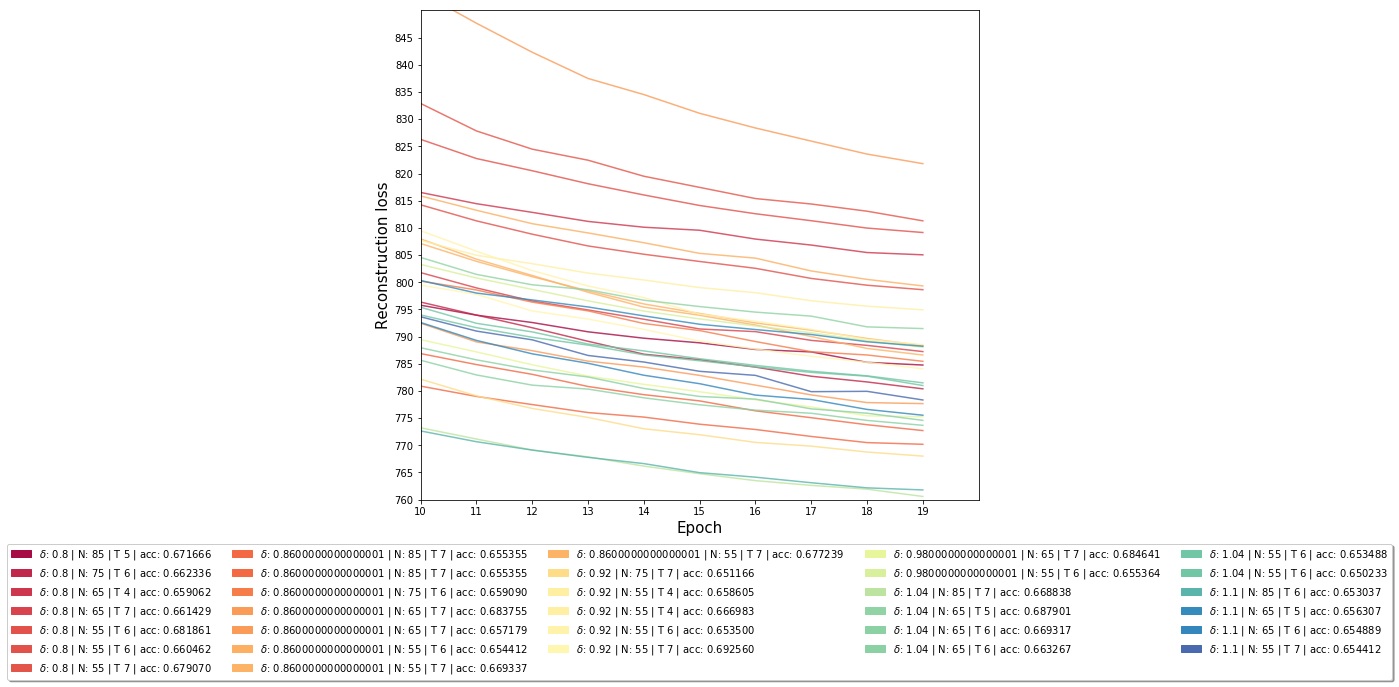

In [23]:
fig, ax = plt.subplots(figsize=(10, 9))
n_different = len(hyperparam_vals[0])*len(hyperparam_vals[1])*len(hyperparam_vals[2])
viridis = plt.cm.Spectral
colors = [viridis(i) for i in np.linspace(0, 0.95, n_different)]

z = 0
patches = []

for i, delta in enumerate(hyperparam_vals[0]):
    for j, N in enumerate(hyperparam_vals[1]):
        for k, T in enumerate(hyperparam_vals[2]):
            
            color = colors[z]
            for l in range(hyperparam_vals[3]):
                plotting = False
                track = loss_values[i, j, k, l][0]
                lr_acc = clf_acc[i, j, k, l][0]
            
                if lr_acc>0.65:
                    plotting=True
                    ax.plot(np.arange(hyperparam_vals[-1]), track, alpha=0.8, color=color)

                if plotting:
                    patches.append(mpatches.Patch(
                                                color=color,
                                                label=r"$\delta$: {} | N: {} | T {} | acc: {:2f}".format(
                                                                                            delta,
                                                                                            N,
                                                                                            T,
                                                                                            lr_acc
                                                                                            )
                                                )
                                    )
            z += 1

#plt.legend(handles=patches)

ax.set_ylim((760, 850))
ax.set_yticks(np.arange(760, 850, 5))

ax.set_xlim((10, 20))
ax.set_xticks(np.arange(10, 20))

ax.set_xlabel("Epoch", fontsize=15)
ax.set_ylabel("Reconstruction loss", fontsize=15)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=5)


ValueError: x and y must have same first dimension, but have shapes (40,) and (250,)

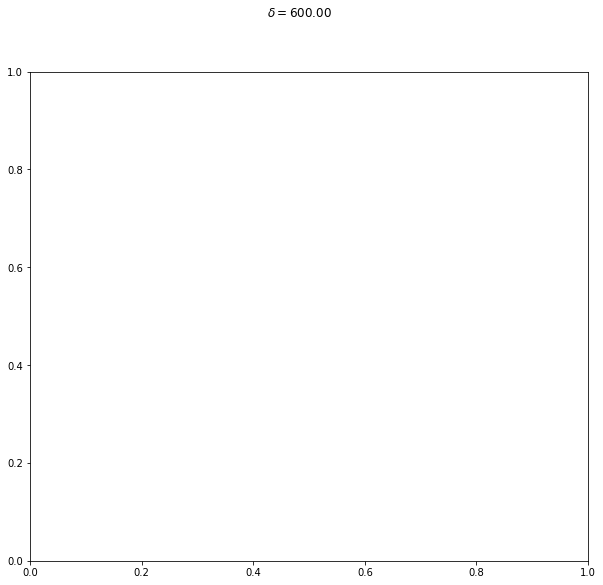

In [7]:
fig, ax = plt.subplots(figsize=(10, 9))

delta_loc = 0
delta_val = hyperparam_vals[0][delta_loc]

fig.suptitle(r"$\delta = {:4.2f}$".format(delta_val))
ax.plot(np.arange(40), loss_values[delta_loc, -1, 0, 0, :], "r-", linewidth=2, alpha = .4, 
        label = "N = {}".format(hyperparam_vals[1][-1])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -2, 0, 0, :], "g-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-2])
       )
ax.plot(np.arange(40), loss_values[delta_loc, -3, 0, 0, :], "b-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-3])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -4, 0, 0, :], "c-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-4])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -5, 0, 0, :], "m-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-5])
    )

ax.plot(np.arange(40), loss_values[delta_loc, -6, 0, 0, :], "y-", linewidth=2, alpha = .4,
       label = "N = {}".format(hyperparam_vals[1][-6])
    )

ax.set_yscale("log")

plt.legend()
ax.set_yticks([100, 220, 230, 240, 250, 260, 300, 350, 500, 1000])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()

In [32]:
images = np.load("../data/clean/images/run_0130_label_False_size_28.npy")

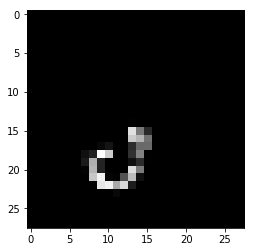

In [33]:
s = 28
selected = images[2].reshape((1, s, s)).copy()
#selected = simulated[3].reshape((1, 128, 128))
#selected[selected < 0.3] = 0

plt.imshow(selected.reshape((s, s)), cmap="Greys_r")

12 20 0.2 0.9 1


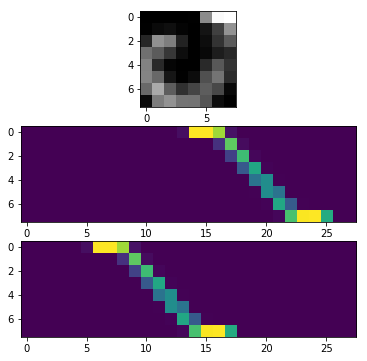

In [37]:
sigma_sq = 0.2
gamma = 1

gx = 12
gy = 20

delta = 0.9
N = 8

H = s
W = s
#gx, gy, sigma_sq, delta, gamma = attn_params(gx, gy, logsigma, delta, loggamma, N)

print(gx, gy, sigma_sq, delta, gamma)
fb = filterbank(s, s)
Fx, Fy = fb.filters(gx, gy, sigma_sq, delta, gamma, N) 

#eq 27  Fy x Fx T

#read op 
Fx_t = np.transpose(Fx, axes=[0, 2, 1])
tmp = np.einsum("ijk, ikn -> ijn", selected, Fx_t)
out = np.einsum("ijk, ikn -> ijn", Fy, tmp)

fig, axs = plt.subplots(nrows = 3, figsize = (10, 6))

axs[2].imshow(Fx.reshape((N, H)))
axs[1].imshow(Fy.reshape((N, H)))
axs[0].imshow(gamma*out.reshape((N, N)), cmap="Greys_r")

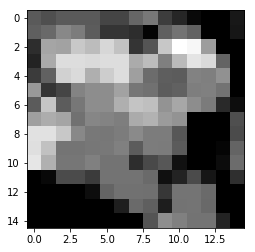

In [29]:
view = (60, 80)
plt.imshow(selected[0, 55:70, 75:90].reshape((15, 15)), cmap="Greys_r")